In [4]:
!pip install wordcloud


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import plotly.express as px
import os
import nltk
import re
import string
import seaborn as sns
import snscrape.modules.twitter as sntwitter
import plotly.graph_objects as go
import itertools
import json
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob


In [39]:
Ruto = pd.read_csv("ruto.csv", encoding = 'utf-8')

In [40]:
Ruto_reviews = pd.DataFrame(Ruto[['id', 'content']])

In [41]:
Ruto_reviews.head()

,id,content
0,1546964438842068993,DP Ruto asks President Kenyatta to stop meddli...
1,1546964427664244736,Wamalwa hits out at DP Ruto for insulting him ...
2,1546963895260254210,"DP Ruto almost slapped me in 2018, Eugene Wama..."
3,1546958360032985089,Truth be told \n@RailaOdinga \n#williamruto\nM...
4,1546954682979033090,We the MULEMBE nation demand an apology from @...


In [42]:
Raila_reviews = pd.read_csv("raila.csv", encoding = 'utf-8')

In [43]:
Raila_reviews = pd.DataFrame(Raila_reviews[['id', 'content']])

In [44]:
Raila_reviews.head()

,id,content
0,1547002695441125377,@MigunaMiguna @MikeSonko @polyigathe @RailaOdi...
1,1547002465752678401,@gpdkaluma @RailaOdinga MTU akiwa na umama ni ...
2,1547001492854476801,Your tweets and the dismal performance by Igat...
3,1547001223210991619,@MigunaMiguna @MikeSonko @polyigathe @RailaOdi...
4,1547001171122028544,@MarthaKarua @RailaOdinga https://t.co/jiuYtxMxdh


In [45]:
Wajackoyah_reviews = pd.read_csv("Wajackoyah.csv", encoding = 'utf-8')

In [46]:
Wajackoyah_reviews = pd.DataFrame(Wajackoyah_reviews[['id', 'content']])

In [47]:
Wajackoyah_reviews.head()


,id,content
0,1547007261297582084,BEST https://t.co/qNo9FEGv8x
1,1547007067063451651,@Hon_wajackoyah_ Fizzling out like slow punctu...
2,1547006487771467777,@AfricaCheck_KE @Hon_wajackoyah_ People only f...
3,1547002039397482496,@AfricaCheck_KE @Hon_wajackoyah_ Mnadanganywa ...
4,1546996898636206081,Biden ameita Supreme Court WAKORA...Kenya sets...


In [ ]:
import pandas as pd
import itertools
import snscrape.modules.twitter as sntwitter
import plotly.graph_objects as go

In [18]:
#Importing the datetime to calculate the time for scraping the 5000 tweets
from datetime import datetime

start_time = datetime.now()

#Creating dataframe called 'data' and storing the tweets from May 1st 2021 to 30th Juy 2021 for 'Vaccine'

mwaure = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    '"#David Mwaure  since:2022-05-01 until:2022-06-30"').get_items(), 10000))
end_time = datetime.now()

#Printing the time duration for scraping these tweets
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:16.983766


In [86]:
mwaure.head(30)

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,https://twitter.com/RichuJay_/status/154221746...,2022-06-29 18:44:31+00:00,@SimiyuMe @Dmwaurewaihiga David Mwaure Waihiga...,@SimiyuMe @Dmwaurewaihiga David Mwaure Waihiga...,1542217467551948800,"{'username': 'RichuJay_', 'id': 14935902839085...",0,0,0,0,...,None,None,None,1.542216e+18,"{'username': 'SimiyuMe', 'id': 150191137214525...","[{'username': 'SimiyuMe', 'id': 15019113721452...",None,None,[Badilisha],None
1,https://twitter.com/RichuJay_/status/154220233...,2022-06-29 17:44:24+00:00,"David Mwaure Waihia, Agano party presidential ...","David Mwaure Waihia, Agano party presidential ...",1542202336558415876,"{'username': 'RichuJay_', 'id': 14935902839085...",1,2,1,0,...,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,None,None,NaN,None,"[{'username': 'Dmwaurewaihiga', 'id': 48489192...",None,None,[Badilisha],None
2,https://twitter.com/SteveKariukis/status/15421...,2022-06-29 13:59:49+00:00,Agano candidate David Mwaure anaongea mbayaa🤣🤣...,Agano candidate David Mwaure anaongea mbayaa🤣🤣...,1542145819868119042,"{'username': 'SteveKariukis', 'id': 325340602,...",0,2,0,0,...,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,None,None,NaN,None,None,None,None,"[FreedomIsComing, BabaNaMarthaLive]",None
3,https://twitter.com/MarakaMwanja/status/154211...,2022-06-29 11:40:33+00:00,@kanyua_joram A good judge listens to every si...,@kanyua_joram A good judge listens to every si...,1542110770313453569,"{'username': 'MarakaMwanja', 'id': 72962890567...",0,0,1,0,...,None,None,None,1.541849e+18,"{'username': 'kanyua_joram', 'id': 14329544905...","[{'username': 'kanyua_joram', 'id': 1432954490...",None,None,None,None
4,https://twitter.com/ViralTeaKe/status/15420767...,2022-06-29 09:25:15+00:00,"NEWS JUST IN\nAzimio La Umoja's, Raila Odinga,...","NEWS JUST IN\nAzimio La Umoja's, Raila Odinga,...",1542076720739762177,"{'username': 'ViralTeaKe', 'id': 1332636092349...",0,0,1,0,...,[{'thumbnailUrl': 'https://pbs.twimg.com/tweet...,None,None,NaN,None,None,None,None,None,None
5,https://twitter.com/marvin_chege10/status/1542...,2022-06-29 09:24:59+00:00,"NEWS JUST IN\nAzimio La Umoja's, Raila Odinga,...","NEWS JUST IN\nAzimio La Umoja's, Raila Odinga,...",1542076656378052608,"{'username': 'marvin_chege10', 'id': 114277140...",0,1,1,0,...,None,None,None,NaN,None,None,None,None,None,None
6,https://twitter.com/Tuko_co_ke/status/15420724...,2022-06-29 09:08:12+00:00,"""Only a fool who would not pick an electronic ...","""Only a fool who would not pick an electronic ...",1542072431304646656,"{'username': 'Tuko_co_ke', 'id': 3131354884, '...",0,0,2,0,...,None,None,None,NaN,None,None,None,None,[tukonews],None
7,https://twitter.com/okoth042/status/1542054277...,2022-06-29 07:56:04+00:00,@Wambuijustina Who is you to say Kenya kwisha!...,@Wambuijustina Who is you to say Kenya kwisha!...,1542054277430001665,"{'username': 'okoth042', 'id': 150813847243087...",0,0,0,0,...,None,None,None,1.541736e+18,"{'username': 'Wambuijustina', 'id': 1532303698...","[{'username': 'Wambuijustina', 'id': 153230369...",None,None,None,None
8,https://twitter.com/tv47ke/status/154205421813...,2022-06-29 07:55:50+00:00,Presidential hopeful David Mwaure alleges he w...,Presidential hopeful David Mwaure alleges he w...,1542054218135117829,"{'username': 'tv47ke', 'id': 3034124811, 'disp...",0,0,1,0,...,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,None,None,NaN,None,None,None,None,[TV47News],None
9,https://twitter.com/lookuptv/status/1542054021...,2022-06-29 07:55:03+00:00,"We in Agano, and myself as the presidential ca...","We in Agano, and myself as the presidential ca...",1542054021908807681,"{'username': 'lookuptv', 'id': 121660151807125...",0,0,0,0,...,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,None,None,NaN,None,None,None,None,[LookUPTV],None


In [19]:
mwaure.to_csv("mwaure.csv")

In [92]:
mwaure_reviews = pd.read_csv("mwaure.csv", encoding = 'utf-8')

In [93]:
mwaure_reviews = pd.DataFrame(mwaure_reviews[['id', 'content']])

In [94]:
mwaure_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       227 non-null    int64 
 1   content  227 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [95]:
mwaure_reviews['content'][50]


'Wananchi wanapenda kusikia unachosimamia kama kiongozi.\n\nKutoka wiki ya kwanza ya mwezi Julai, tuna mipango ya kufanya kampeni rasmi baada ya kutoa manifesto - David Mwaure. ^MM https://t.co/G6BvbmngQk'

# Sentiment Analysis

i. For Ruto

In [48]:
text_blob_object1 = TextBlob(Ruto_reviews['content'][50])
print(text_blob_object1.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


In [49]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

Ruto_reviews['Sentiment_Polarity'] = Ruto_reviews['content'].apply(find_pol)
Ruto_reviews.tail()

,id,content,Sentiment_Polarity
2182,1520723694003363840,God bless Kenya\n#MunguKwanza\n#MunguMbele\n#K...,0.00
2183,1520706755180871681,@matesobilachuki @GunnerAfrican @NelsonHavi @w...,0.00
2184,1520702716103860224,To all hustlers and workers \nYou are the reas...,0.00
2185,1520699307225010176,"@WilliamsRuto Today 1st May of 2022, the @cisu...",0.60
2186,1520667373782679554,Why do you think H. E Uhuru allowed his Deputy...,0.15


In [56]:
Ruto_reviews['Expression Label'] = np.where(Ruto_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Ruto_reviews['Expression Label'][Ruto_reviews.Sentiment_Polarity ==0] = "Neutral"
Ruto_reviews.tail()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\3932885584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ruto_reviews['Expression Label'][Ruto_reviews.Sentiment_Polarity ==0] = "Neutral"


,id,content,Sentiment_Polarity,Expression Label
2182,1520723694003363840,God bless Kenya\n#MunguKwanza\n#MunguMbele\n#K...,0.00,Neutral
2183,1520706755180871681,@matesobilachuki @GunnerAfrican @NelsonHavi @w...,0.00,Neutral
2184,1520702716103860224,To all hustlers and workers \nYou are the reas...,0.00,Neutral
2185,1520699307225010176,"@WilliamsRuto Today 1st May of 2022, the @cisu...",0.60,positive
2186,1520667373782679554,Why do you think H. E Uhuru allowed his Deputy...,0.15,positive


In [57]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

Raila_reviews['Sentiment_Polarity'] = Raila_reviews['content'].apply(find_pol)
Raila_reviews.tail()

,id,content,Sentiment_Polarity,Expression Label
9995,1546076822848393217,@HonAyubSavula @RailaOdinga I told you brother...,0.0,Neutral
9996,1546076796826910721,@Ekalenicholus @MarthaKarua @RailaOdinga @ahme...,0.0,Neutral
9997,1546076455913783299,@RailaOdinga the 5th. https://t.co/830XKtn2q3,0.0,Neutral
9998,1546076309821988864,@timothy_riang @RailaOdinga @MRSMuruguK kindly...,0.6,positive
9999,1546076303547371521,@RailaOdinga Sorry...wats coming home,0.0,Neutral


In [58]:
Raila_reviews['Expression Label'] = np.where(Raila_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Raila_reviews['Expression Label'][Raila_reviews.Sentiment_Polarity ==0] = "Neutral"
Raila_reviews.tail()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\1608410813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raila_reviews['Expression Label'][Raila_reviews.Sentiment_Polarity ==0] = "Neutral"


,id,content,Sentiment_Polarity,Expression Label
9995,1546076822848393217,@HonAyubSavula @RailaOdinga I told you brother...,0.0,Neutral
9996,1546076796826910721,@Ekalenicholus @MarthaKarua @RailaOdinga @ahme...,0.0,Neutral
9997,1546076455913783299,@RailaOdinga the 5th. https://t.co/830XKtn2q3,0.0,Neutral
9998,1546076309821988864,@timothy_riang @RailaOdinga @MRSMuruguK kindly...,0.6,positive
9999,1546076303547371521,@RailaOdinga Sorry...wats coming home,0.0,Neutral


In [59]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

Wajackoyah_reviews['Sentiment_Polarity'] = Wajackoyah_reviews['content'].apply(find_pol)
Wajackoyah_reviews.tail()

,id,content,Sentiment_Polarity,Expression Label
9995,1543122751543721984,@johnnjenga what I saw through my balcony to s...,0.000000,Neutral
9996,1543122377613123584,@Hon_wajackoyah_ Kabisa the 5th,0.000000,Neutral
9997,1543122351067381760,https://t.co/hiOyYYWUYC\nGanja Farmer vs Babyl...,0.000000,Neutral
9998,1543122256825647106,"@FauzKhalid001 @KoneMoheavy I concur with you,...",0.333333,positive
9999,1543122235204026369,@KTNNewsKE you are already biased in that pict...,0.000000,Neutral


In [60]:
Wajackoyah_reviews['Expression Label'] = np.where(Wajackoyah_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Wajackoyah_reviews['Expression Label'][Wajackoyah_reviews.Sentiment_Polarity ==0] = "Neutral"
Wajackoyah_reviews.tail()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\2451573919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wajackoyah_reviews['Expression Label'][Wajackoyah_reviews.Sentiment_Polarity ==0] = "Neutral"


,id,content,Sentiment_Polarity,Expression Label
9995,1543122751543721984,@johnnjenga what I saw through my balcony to s...,0.000000,Neutral
9996,1543122377613123584,@Hon_wajackoyah_ Kabisa the 5th,0.000000,Neutral
9997,1543122351067381760,https://t.co/hiOyYYWUYC\nGanja Farmer vs Babyl...,0.000000,Neutral
9998,1543122256825647106,"@FauzKhalid001 @KoneMoheavy I concur with you,...",0.333333,positive
9999,1543122235204026369,@KTNNewsKE you are already biased in that pict...,0.000000,Neutral


In [96]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

mwaure_reviews['Sentiment_Polarity'] = mwaure_reviews['content'].apply(find_pol)
mwaure_reviews.tail()

,id,content,Sentiment_Polarity
222,1528457756809777155,"@Dmwaurewaihiga The real deal, the real change...",0.200
223,1524450918871281664,''The Evangelical Alliance of Kenya @EAK_Kenya...,0.125
224,1524425716363927553,"Ahũranĩri a Ũpresident William Ruto, Reuben Ki...",0.000
225,1523403331070164992,@WehliyeMohamed @ahmednasirlaw GM being the un...,0.375
226,1521781502970900481,68 individuals including Waihiga David Mwaure ...,0.000


In [97]:
mwaure_reviews['Expression Label'] = np.where(mwaure_reviews['Sentiment_Polarity']>0,'positive', 'negative')
mwaure_reviews['Expression Label'][mwaure_reviews.Sentiment_Polarity ==0] = "Neutral"
mwaure_reviews.tail()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\2709168021.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,content,Sentiment_Polarity,Expression Label
222,1528457756809777155,"@Dmwaurewaihiga The real deal, the real change...",0.200,positive
223,1524450918871281664,''The Evangelical Alliance of Kenya @EAK_Kenya...,0.125,positive
224,1524425716363927553,"Ahũranĩri a Ũpresident William Ruto, Reuben Ki...",0.000,Neutral
225,1523403331070164992,@WehliyeMohamed @ahmednasirlaw GM being the un...,0.375,positive
226,1521781502970900481,68 individuals including Waihiga David Mwaure ...,0.000,Neutral


In [63]:
new1 = Ruto_reviews.groupby('Expression Label').count()

In [64]:
x = list(new1['Sentiment_Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))

In [98]:
df = pd.DataFrame(tuple_list, columns=['x','y'])

df['color'] = 'blue'
df['color'][1] = 'red'
df['color'][2] = 'green'

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\3334205875.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\3334205875.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
new1 = Raila_reviews.groupby('Expression Label').count()
x = list(new1['Sentiment_Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))

df = pd.DataFrame(tuple_list, columns=['x','y'])

df['color'] = 'blue'
df['color'][1] = 'red'
df['color'][2] = 'green'

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\2158708452.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\2158708452.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
new1 = Wajackoyah_reviews.groupby('Expression Label').count()
x = list(new1['Sentiment_Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))

df = pd.DataFrame(tuple_list, columns=['x','y'])

df['color'] = 'blue'
df['color'][1] = 'red'
df['color'][2] = 'green'

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\1854533484.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\1854533484.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
new1 = mwaure_reviews.groupby('Expression Label').count()
x = list(new1['Sentiment_Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))

df = pd.DataFrame(tuple_list, columns=['x','y'])

df['color'] = 'blue'
df['color'][1] = 'red'
df['color'][2] = 'green'

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\2134536776.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\2134536776.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
reviews1 = Ruto_reviews[Ruto_reviews['Sentiment_Polarity'] == 0.0000]
reviews1.shape

cond1=Ruto_reviews['Sentiment_Polarity'].isin(reviews1['Sentiment_Polarity'])
Ruto_reviews.drop(Ruto_reviews[cond1].index, inplace = True)
Ruto_reviews.shape

np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(Ruto_reviews.index, remove_n, replace=False)
df_subset_Ruto = Ruto_reviews.drop(drop_indices)
df_subset_Ruto.shape

(384, 4)

In [70]:
reviews2 = Raila_reviews[Raila_reviews['Sentiment_Polarity'] == 0.0000]
reviews2.shape

cond1=Raila_reviews['Sentiment_Polarity'].isin(reviews2['Sentiment_Polarity'])
Raila_reviews.drop(Raila_reviews[cond1].index, inplace = True)
Raila_reviews.shape

np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(Raila_reviews.index, remove_n, replace=False)
df_subset_Raila = Raila_reviews.drop(drop_indices)
df_subset_Raila.shape


(3602, 4)

In [71]:
reviews3 = Wajackoyah_reviews[Wajackoyah_reviews['Sentiment_Polarity'] == 0.0000]
reviews3.shape

cond1=Wajackoyah_reviews['Sentiment_Polarity'].isin(reviews3['Sentiment_Polarity'])
Wajackoyah_reviews.drop(Wajackoyah_reviews[cond1].index, inplace = True)
Wajackoyah_reviews.shape

np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(Wajackoyah_reviews.index, remove_n, replace=False)
df_subset_Wajackoyah = Wajackoyah_reviews.drop(drop_indices)
df_subset_Wajackoyah.shape

(3185, 4)

In [112]:
reviews4 = mwaure_reviews[mwaure_reviews['Sentiment_Polarity'] == 0.0000]
reviews4.shape

cond1=mwaure_reviews['Sentiment_Polarity'].isin(reviews4['Sentiment_Polarity'])
mwaure_reviews.drop(mwaure_reviews[cond1].index, inplace = True)
mwaure_reviews.shape

np.random.seed(10)
remove_n =20
drop_indices = np.random.choice(mwaure_reviews.index, remove_n, replace=False)
df_subset_mwaure = mwaure_reviews.drop(drop_indices)
df_subset_mwaure.shape

(52, 4)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

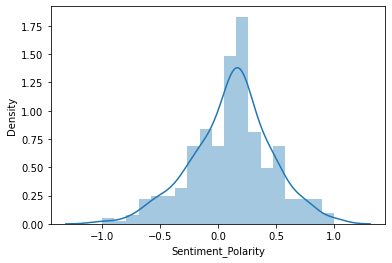

In [113]:
sns.distplot(df_subset_Ruto['Sentiment_Polarity'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

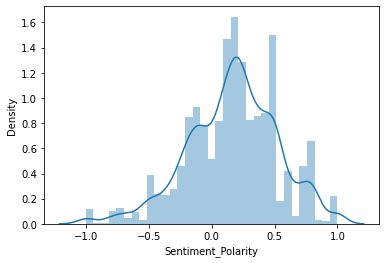

In [114]:
sns.distplot(df_subset_Raila['Sentiment_Polarity'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

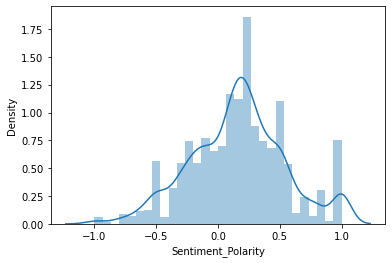

In [115]:
sns.distplot(df_subset_Wajackoyah['Sentiment_Polarity'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

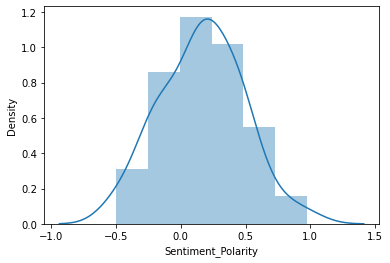

In [116]:
sns.distplot(df_subset_mwaure['Sentiment_Polarity'])

In [117]:
count_1 = df_subset_Ruto.groupby('Expression Label').count()

print(count_1)

                   id  content  Sentiment_Polarity
Expression Label                                  
negative          125      125                 125
positive          259      259                 259


In [118]:
count_2 = df_subset_Raila.groupby('Expression Label').count()
print(count_2)

                    id  content  Sentiment_Polarity
Expression Label                                   
negative          1076     1076                1076
positive          2526     2526                2526


In [119]:
count_3 = df_subset_Wajackoyah.groupby('Expression Label').count()
print(count_3)

                    id  content  Sentiment_Polarity
Expression Label                                   
negative           998      998                 998
positive          2187     2187                2187


In [120]:
count_4 = df_subset_mwaure.groupby('Expression Label').count()
print(count_4)

                  id  content  Sentiment_Polarity
Expression Label                                 
negative          15       15                  15
positive          37       37                  37


In [122]:
negative_per1 = (count_1['Sentiment_Polarity'][0]/1000)*100
positive_per1 = (count_1['Sentiment_Polarity'][1]/1000)*100

negative_per2 = (count_2['Sentiment_Polarity'][0]/1000)*100
positive_per2 = (count_2['Sentiment_Polarity'][1]/1000)*100

negative_per3 = (count_3['Sentiment_Polarity'][0]/1000)*100
positive_per3 = (count_3['Sentiment_Polarity'][1]/1000)*100

negative_per4 = (count_4['Sentiment_Polarity'][0]/100)*10
positive_per4 = (count_4['Sentiment_Polarity'][1]/100)*10


In [123]:
Politicians = ['Ruto Samoei','Raila Odinga', 'Wajackoyah', 'waihiga Mwaure']
lis_pos = [positive_per1, positive_per2, positive_per3, positive_per4]
lis_neg = [negative_per1, negative_per2, negative_per3, negative_per4]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=Politicians, y=lis_pos),
    go.Bar(name='Negative', x=Politicians, y=lis_neg)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

# Using Wordcloud

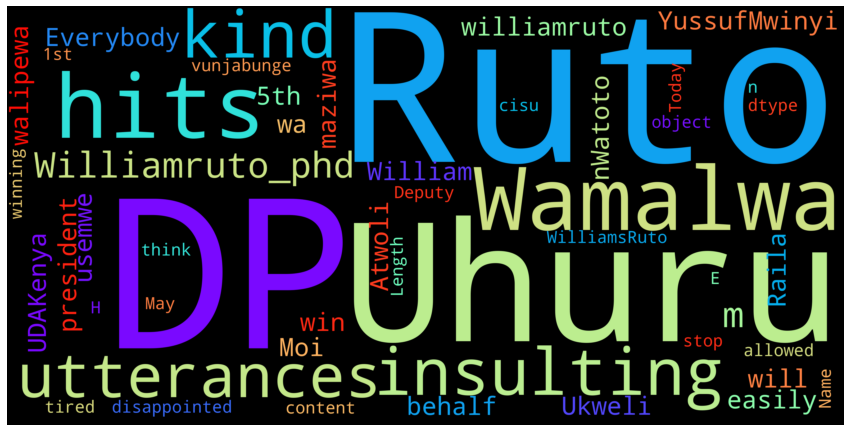

In [124]:
# Start with one review:
text = str(Ruto_reviews.content)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500, scale=10, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

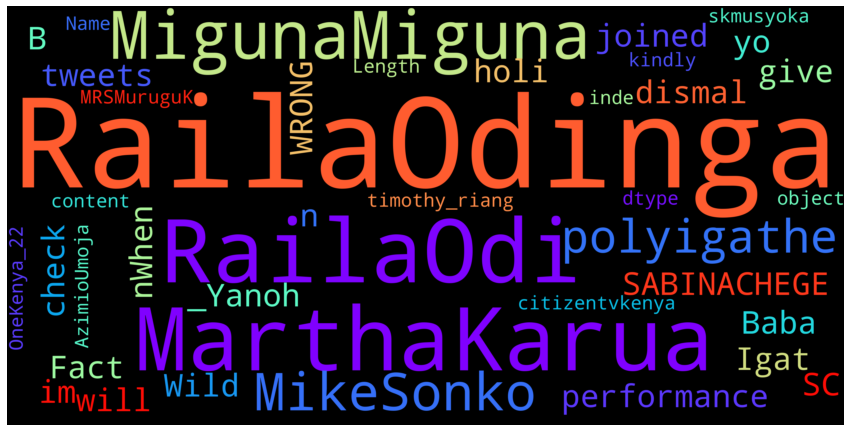

In [125]:
# Start with one review:
text = str(Raila_reviews.content)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500, scale=10, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

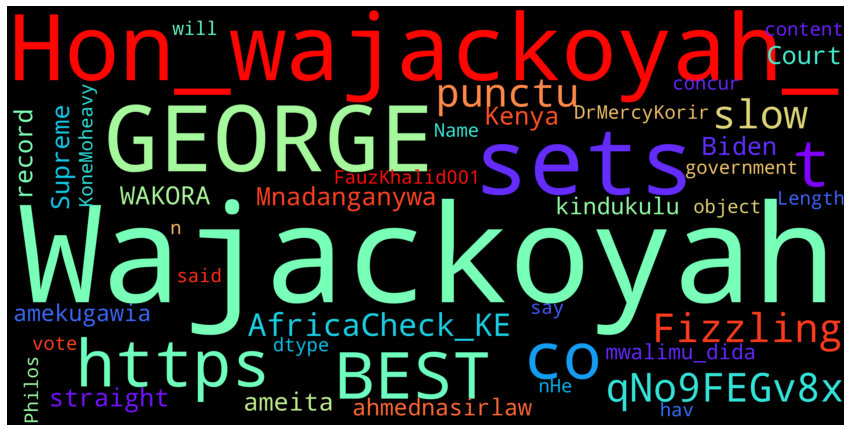

In [126]:
# Start with one review:
text = str(Wajackoyah_reviews.content)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500, scale=10, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

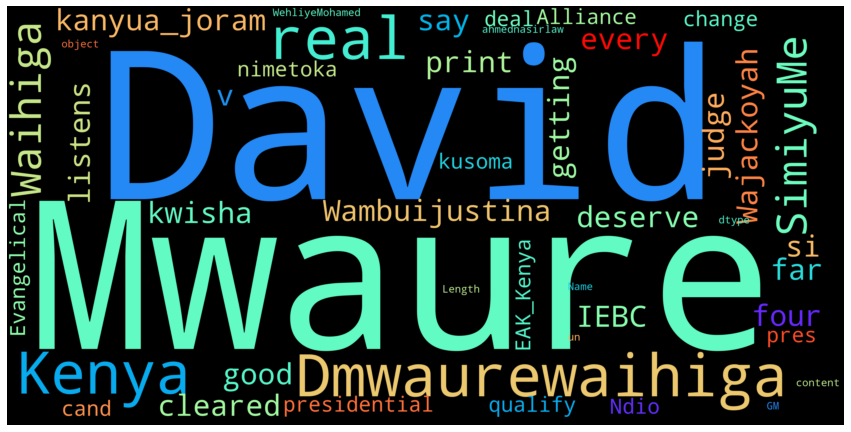

In [127]:
# Start with one review:
text = str(mwaure_reviews.content)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500, scale=10, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analysis Using their Negative respponses

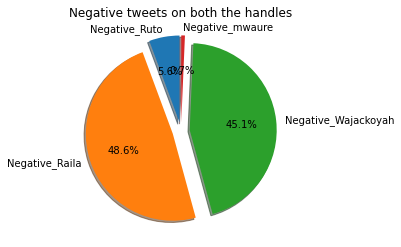

In [130]:
labels =  ['Negative_Ruto', 'Negative_Raila','Negative_Wajackoyah','Negative_mwaure'] 
sizes = lis_neg
explode = (0.1, 0.1,0.1,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Negative tweets on both the handles')
plt.show()

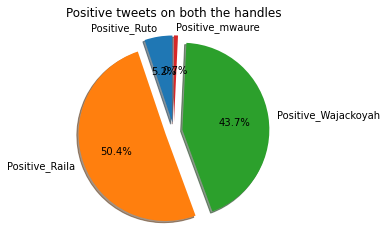

In [131]:
labels =  ['Positive_Ruto', 'Positive_Raila','Positive_Wajackoyah','Positive_mwaure'] 
sizes = lis_pos
explode = (0.1, 0.1,0.1,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Positive tweets on both the handles')
plt.show()

# Using sentiment pipelines



In [135]:
!pip install transformers

In [140]:

#Importing pipeline from Transformers

from transformers import pipeline
sentiment_classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [ ]:
!pip install tensorflow

In [1]:
#Importing pipeline from Transformers

from transformers import pipeline
sentiment_classifier = pipeline('sentiment-analysis')

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.